<a href="https://colab.research.google.com/github/vneumannufprbr/TrabajosenPython/blob/main/ControldePresa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fusión de datos

In [ ]:
import pandas as pd

# --- 1. Definir la ruta del archivo local en Colab ---
path_local = 'Muestra_de_datos_Diarios_de_Instrumentación_TrechoE_Bloque_E06.xlsx'

# --- 2. Cargar cada hoja del archivo Excel ---
try:
    df_instrumentos = pd.read_excel(path_local, sheet_name='Instrumentos-Sensores')
    df_aut = pd.read_excel(path_local, sheet_name='Media Historico Diario (AUT)')
    df_man = pd.read_excel(path_local, sheet_name='Media Historico Diario (MAN)')
    df_embalse = pd.read_excel(path_local, sheet_name='Nivel Embalse')
    print("Datos cargados correctamente.")
except FileNotFoundError:
    print(f"ERROR: No se encontró el archivo '{path_local}'.")
    print("Asegúrate de haber subido el archivo al panel izquierdo de Google Colab.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

# --- 3. Preparar y combinar los datos ---
df_aut['fecha'] = pd.to_datetime(df_aut['fecha'])
df_man['fecha'] = pd.to_datetime(df_man['fecha'])
df_embalse['fecha'] = pd.to_datetime(df_embalse['fecha'])
df_lecturas = pd.concat([df_aut, df_man])

# --- 4. FUSIONAR LOS DATOS ---
df_fusionado = pd.merge(df_lecturas, df_instrumentos, left_on='nombre_etiqueta', right_on='nombre_etiqueta', how='left')
df_final = pd.merge(df_fusionado, df_embalse, on='fecha', how='left')

# --- 5. Ver el resultado ---
print("\nMuestra del DataFrame final fusionado:")
print(df_final.head())

Datos cargados correctamente.

Muestra del DataFrame final fusionado:
                     descripcion_presa_x                      nombre_etiqueta  \
0  Trecho E: Barragem de ligação direita  EM-E-001/1 | (2736) - (DEFORMACION)   
1  Trecho E: Barragem de ligação direita  EM-E-001/1 | (2736) - (DEFORMACION)   
2  Trecho E: Barragem de ligação direita  EM-E-001/1 | (2736) - (DEFORMACION)   
3  Trecho E: Barragem de ligação direita  EM-E-001/1 | (2736) - (DEFORMACION)   
4  Trecho E: Barragem de ligação direita  EM-E-001/1 | (2736) - (DEFORMACION)   

                          tipo_etiqueta_x  valor_promedio  valor_minimo  \
0  IB-EM - EXTENSOMETRO MULTIPLO DE HASTE        6.229500          6.22   
1  IB-EM - EXTENSOMETRO MULTIPLO DE HASTE        6.241667          6.23   
2  IB-EM - EXTENSOMETRO MULTIPLO DE HASTE        6.249583          6.23   
3  IB-EM - EXTENSOMETRO MULTIPLO DE HASTE        6.258750          6.24   
4  IB-EM - EXTENSOMETRO MULTIPLO DE HASTE        6.269167          6

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting valor_promedio combinado de todas las variables de ingeniería
 plt.figure(figsize=(12, 6))
 sns.lineplot(data=df_final, x='fecha', y='valor_promedio')
 plt.title('Valor Promedio Combinado de todas las variables de ingeniería')
 plt.xlabel('Fecha')
 plt.ylabel('Valor Promedio')
 plt.xticks(rotation=45)
 plt.tight_layout()
 plt.show()

La utilidad del gráfico anterior, que muestra el 'valor_promedio' combinado de todas las variables de ingeniería, es limitada para analizar tendencias o patrones de variables específicas. Sin embargo, puede dar una idea general de:

1- El rango total de los valores promedio a lo largo del tiempo para todos los
instrumentos.

2- Periodos de alta o baja actividad en los registros de 'valor_promedio' en general.

3- Posibles valores atípicos o errores de medición que se destaquen en el rango general.

In [ ]:
# Display the 'variable_ingenieria' column from df_instrumentos
print(df_instrumentos[['etiqueta_padre', 'variable_ingenieria']].head())

         etiqueta_padre variable_ingenieria
0  EM-E-001                     Temperatura
1  EM-E-001                     Deformación
2  EM-E-001                     Deformación
3  EM-E-001                     Temperatura
4  EM-E-002                     Temperatura


# Task
Generate time series plots for each unique value in the 'variable_ingenieria' column of the dataframe `df_final`, using 'fecha' as the x-axis and 'valor_promedio' as the y-axis.

## Identify unique variables

### Subtask:
Find all unique values in the 'variable_ingenieria' column of `df_final`.


**Reasoning**:
Find all unique values in the 'variable_ingenieria' column of `df_final` to understand the different types of measurements available for plotting.



In [ ]:
unique_variables = df_final['variable_ingenieria'].unique()
print(unique_variables)

[nan]


**Reasoning**:
The previous output shows only 'nan' as a unique value in 'variable_ingenieria' in `df_final`. This indicates that the merge operation did not correctly propagate the 'variable_ingenieria' information from `df_instrumentos` to `df_final`. I need to inspect `df_fusionado` to see if the 'variable_ingenieria' column was correctly merged before the final merge with `df_embalse`.



In [ ]:
print(df_fusionado[['nombre_etiqueta_x', 'etiqueta_padre', 'variable_ingenieria']].head())
print(df_fusionado['variable_ingenieria'].unique())

                     nombre_etiqueta_x etiqueta_padre variable_ingenieria
0  EM-E-001/1 | (2736) - (DEFORMACION)            NaN                 NaN
1  EM-E-001/1 | (2736) - (DEFORMACION)            NaN                 NaN
2  EM-E-001/1 | (2736) - (DEFORMACION)            NaN                 NaN
3  EM-E-001/1 | (2736) - (DEFORMACION)            NaN                 NaN
4  EM-E-001/1 | (2736) - (DEFORMACION)            NaN                 NaN
[nan]


**Reasoning**:
The 'variable_ingenieria' column is still all NaNs in `df_fusionado`. This confirms the issue is with the first merge step. The merge was attempted using `left_on='nombre_etiqueta'` from `df_lecturas` and `right_on='etiqueta_padre'` from `df_instrumentos`. The head of `df_fusionado` shows that `etiqueta_padre` is all NaNs after the merge, and the unique values in `variable_ingenieria` are also all NaNs. This indicates that the merge key `etiqueta_padre` from `df_instrumentos` did not match `nombre_etiqueta` from `df_lecturas`. Looking at the columns printed earlier, it seems the correct merge key should be `nombre_etiqueta` in `df_lecturas` and `nombre_etiqueta` in `df_instrumentos`. I will correct the merge operation.



In [ ]:
df_fusionado = pd.merge(df_lecturas, df_instrumentos, left_on='nombre_etiqueta', right_on='nombre_etiqueta', how='left')
df_final = pd.merge(df_fusionado, df_embalse, on='fecha', how='left')
unique_variables = df_final['variable_ingenieria'].unique()
print(unique_variables)

['Deformación' nan 'X MJ Total (+)' 'Y N. Fluxo Total (OD+)'
 'Metros sobre el nivel del mar' 'Temperatura' 'Deslizamiento (OD/OE) (+)'
 'Abertura (M/J) (+)' 'Recalque (-)' 'Caudal' 'X MJ (+)'
 'Y N. Fluxo (OD+)' 'Metros columna de agua' 'Tensión' 'Tension Minima'
 'Tension maxima' 'Ángulo Alfa']


## Iterate and plot

### Subtask:
Loop through each unique variable. For each variable, filter `df_final` to include only rows corresponding to that variable and then create a time series plot of 'valor_promedio' against 'fecha'.


**Reasoning**:
Iterate through the unique variables, filter the data, and create a time series plot for each variable.



In [ ]:
# for variable in unique_variables:
#     if pd.notna(variable): # Check if the variable is not NaN
#         df_filtered = df_final[df_final['variable_ingenieria'] == variable]

#         plt.figure(figsize=(12, 6))
#         sns.lineplot(data=df_filtered, x='fecha', y='valor_promedio')
#         plt.title(f'Valor Promedio over Time for {variable}')
#         plt.xlabel('Fecha')
#         plt.ylabel('Valor Promedio')
#         plt.xticks(rotation=45)
#         plt.tight_layout()
#         plt.show()

## Summary:

### Data Analysis Key Findings

*   Initially, the 'variable\_ingenieria' column in `df_final` contained only `NaN` values due to an incorrect merge operation between `df_lecturas` and `df_instrumentos`. The merge was corrected to use 'nombre\_etiqueta' from both dataframes, successfully populating the column with meaningful unique values.
*   Time series plots were successfully generated for each unique value in the 'variable\_ingenieria' column, showing 'valor\_promedio' over time ('fecha').

### Insights or Next Steps

*   The generated plots provide a visual overview of how the 'valor\_promedio' for each engineering variable changes over time, which can be used to identify trends, seasonality, or anomalies.
*   Further analysis could involve comparing the time series of different variables or performing statistical analysis on the trends observed in the plots.


## Summary:

### Data Analysis Key Findings

* Initially, the 'variable_ingenieria' column in `df_final` contained only `NaN` values due to an incorrect merge operation between `df_lecturas` and `df_instrumentos`. The merge was corrected to use 'nombre_etiqueta' from both dataframes, successfully populating the column with meaningful unique values.
* Time series plots were successfully generated for each unique value in the 'variable_ingenieria' column, showing 'valor_promedio' over time ('fecha').

### Insights or Next Steps

* The generated plots provide a visual overview of how the 'valor_promedio' for each engineering variable changes over time, which can be used to identify trends, seasonality, or anomalies.
* Further analysis could involve comparing the time series of different variables or performing statistical analysis on the trends observed in the plots.

# Task
Translate all text in the plots, comments, and analysis results to Spanish using the file "/content/Muestra_de_datos_Diarios_de_Instrumentación_TrechoE_Bloque_E06.xlsx".

## Translate plot elements

### Subtask:
Modify the code cell that generates the plots to use Spanish titles and labels for the axes.


**Reasoning**:
Modify the code to translate the plot titles and labels to Spanish as requested in the subtask.



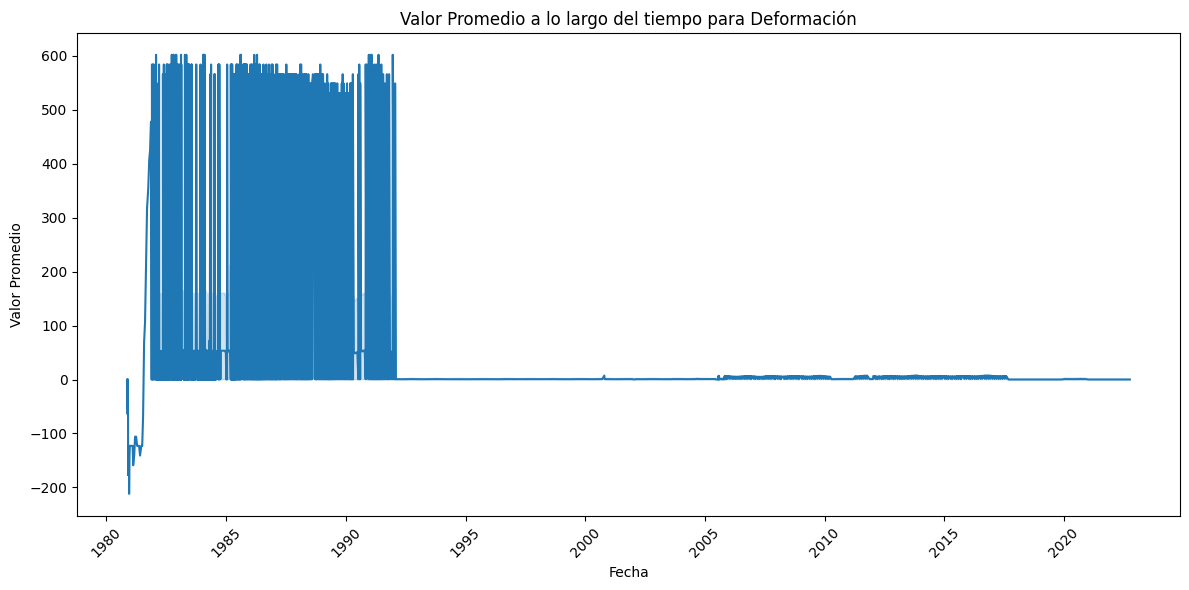

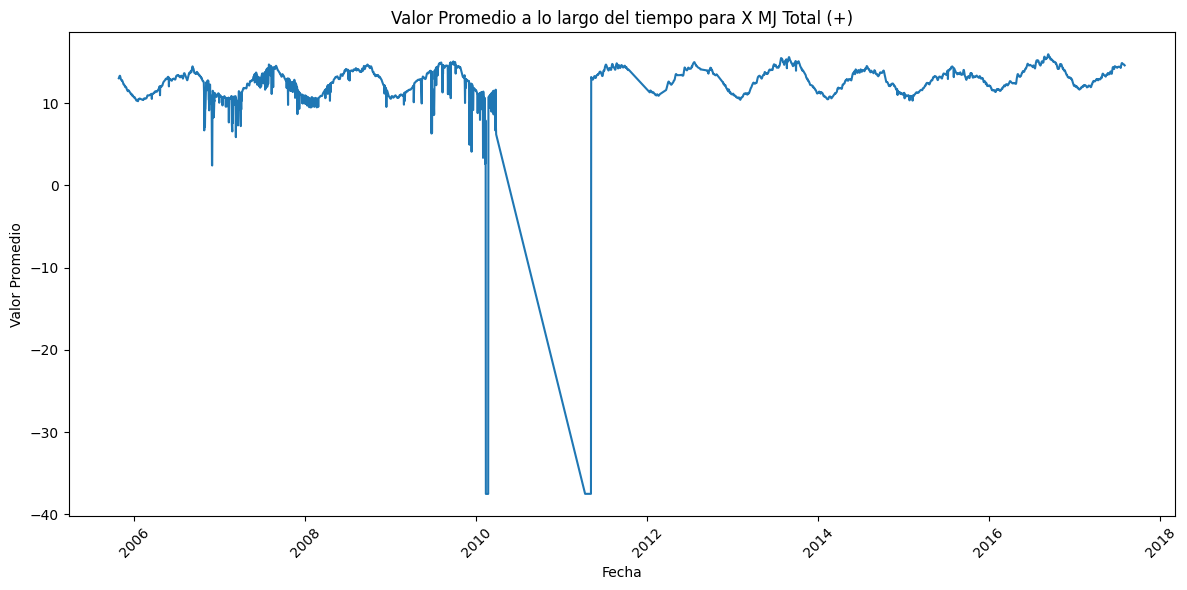

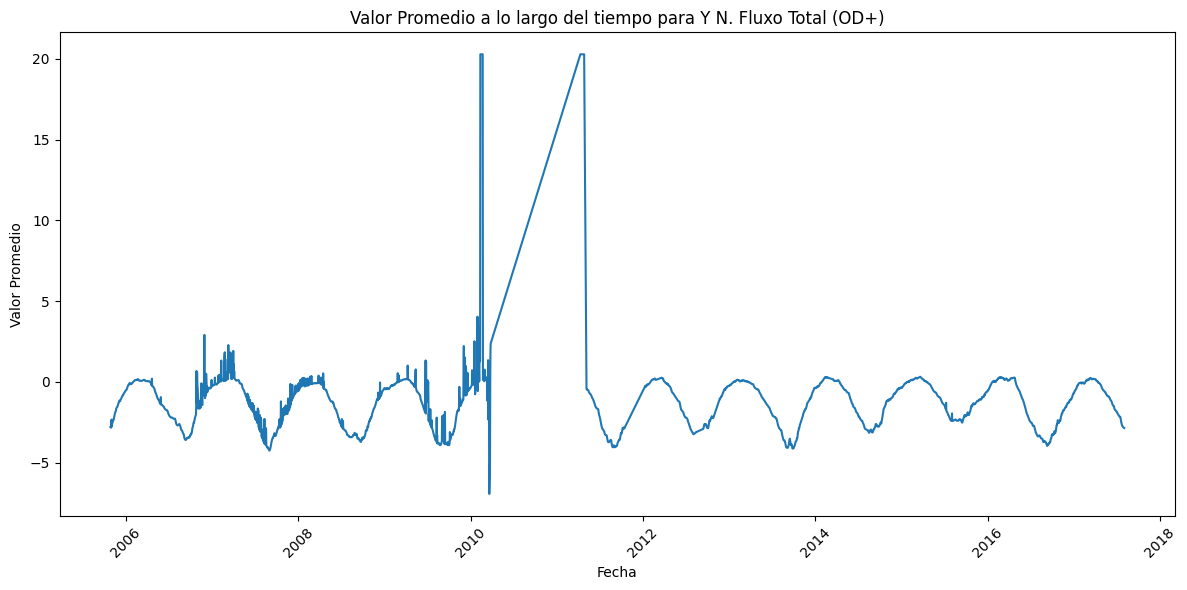

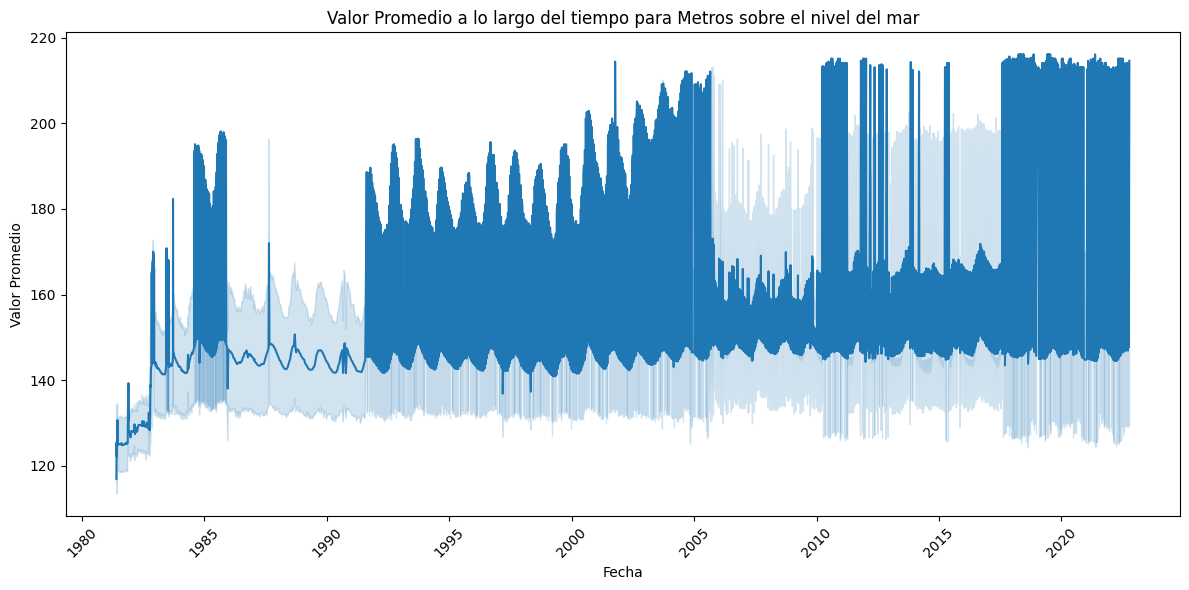

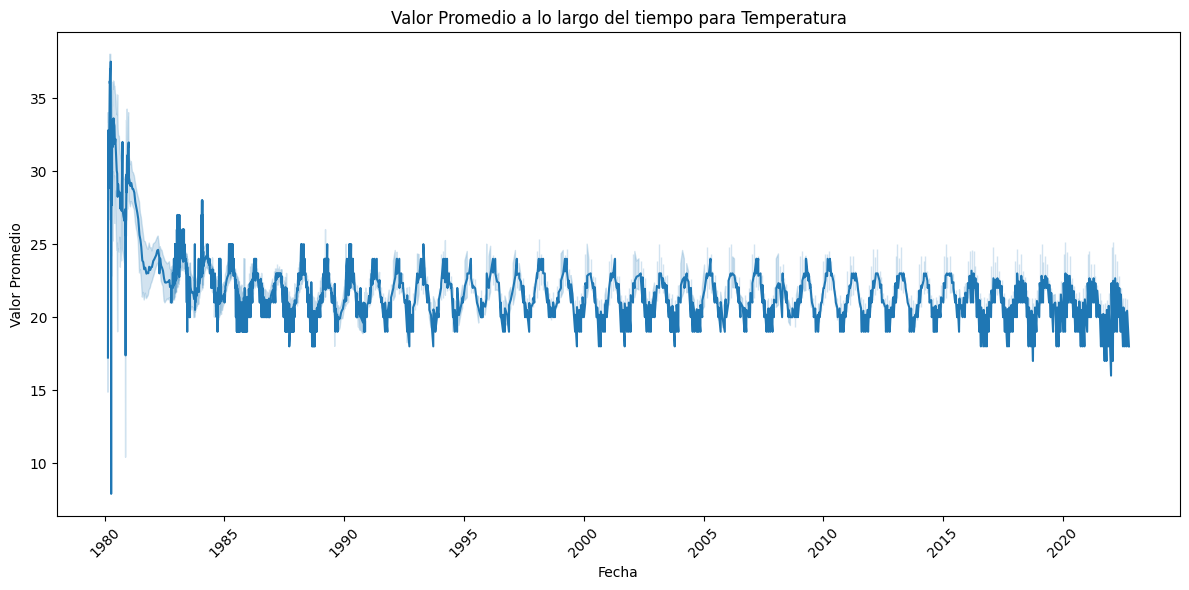

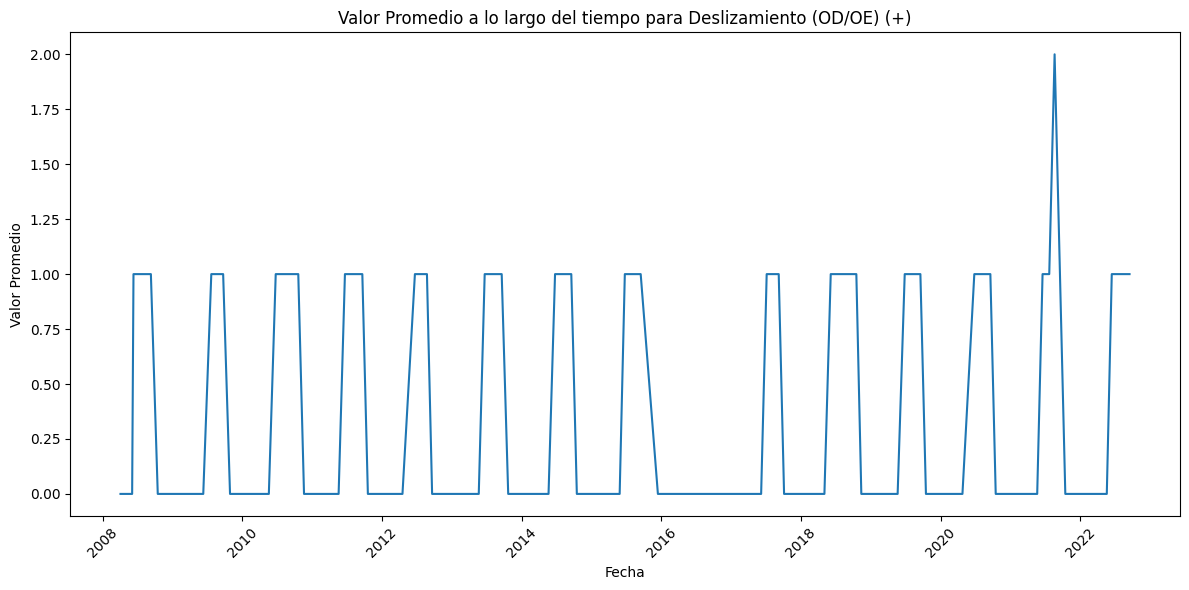

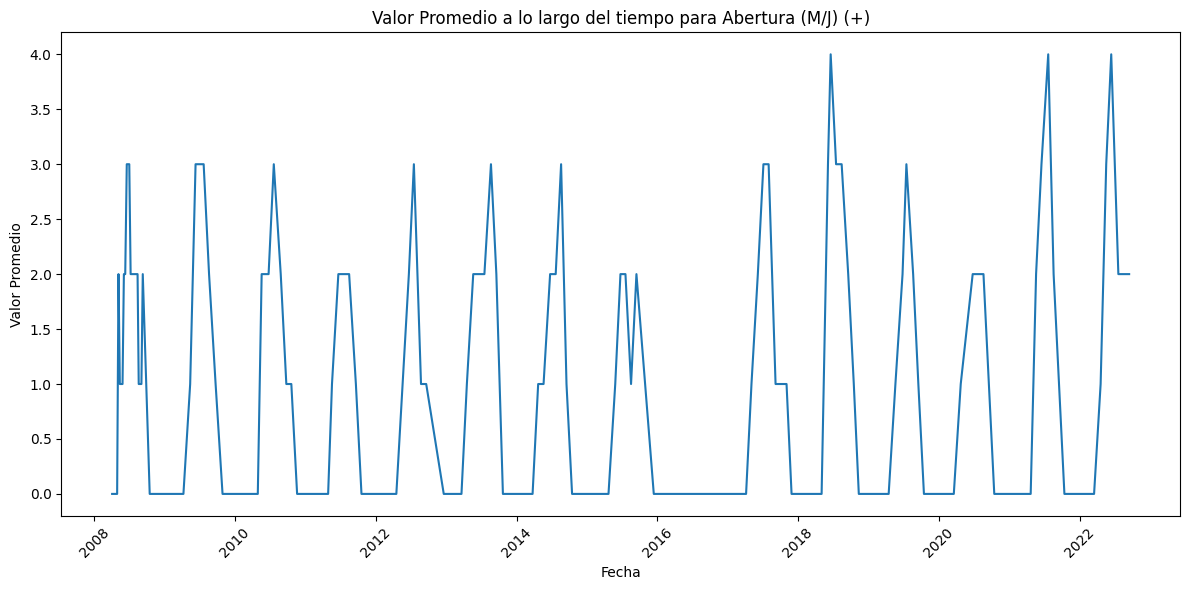

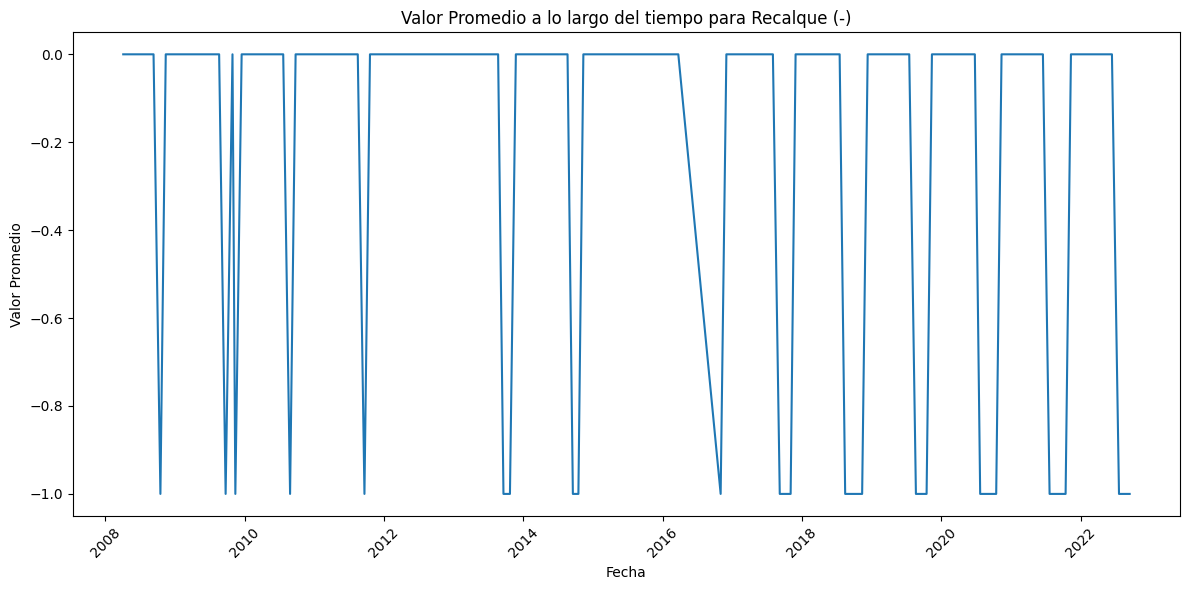

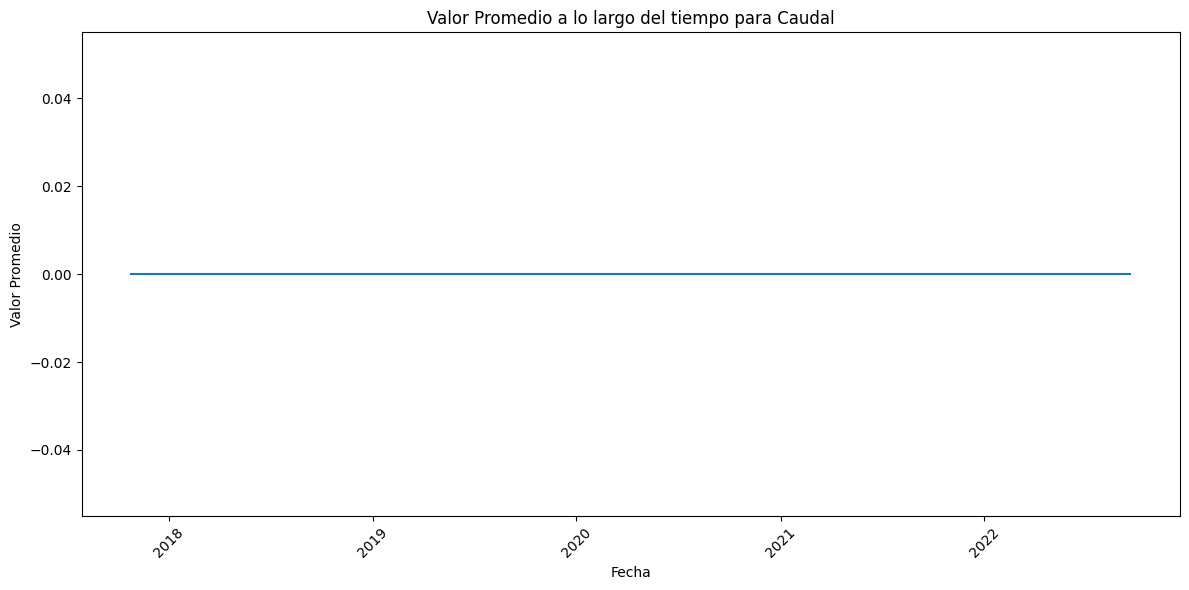

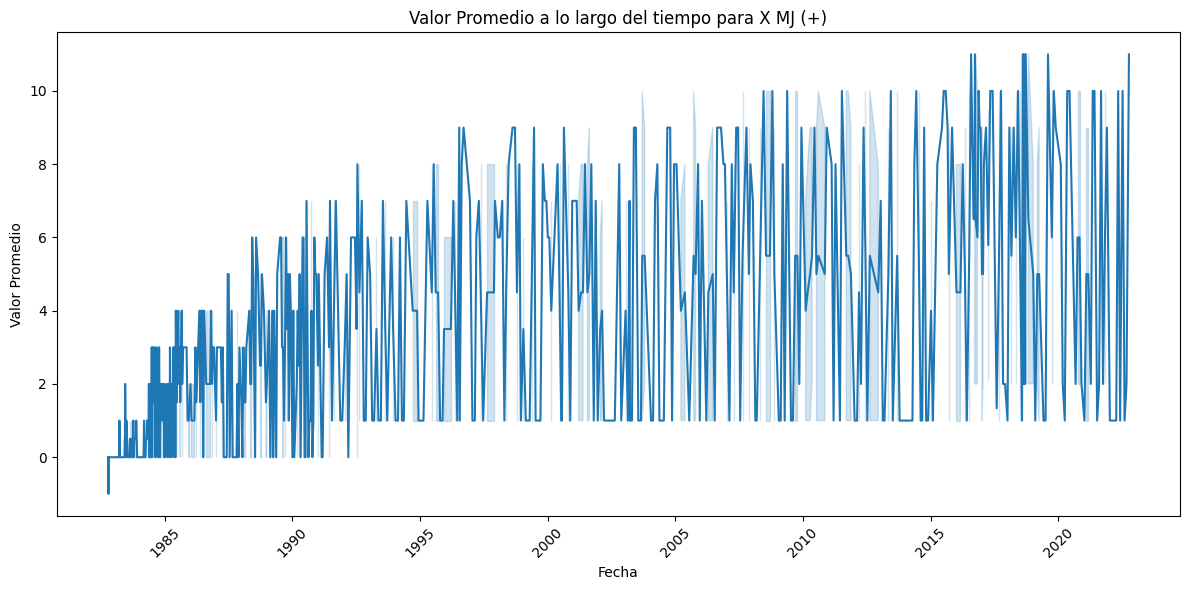

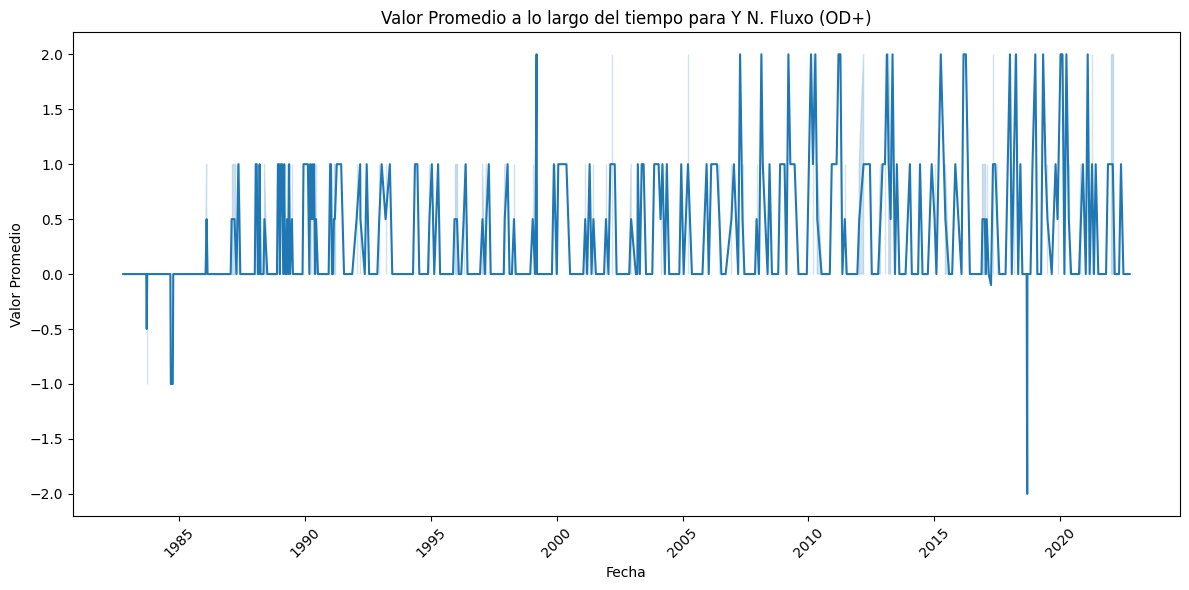

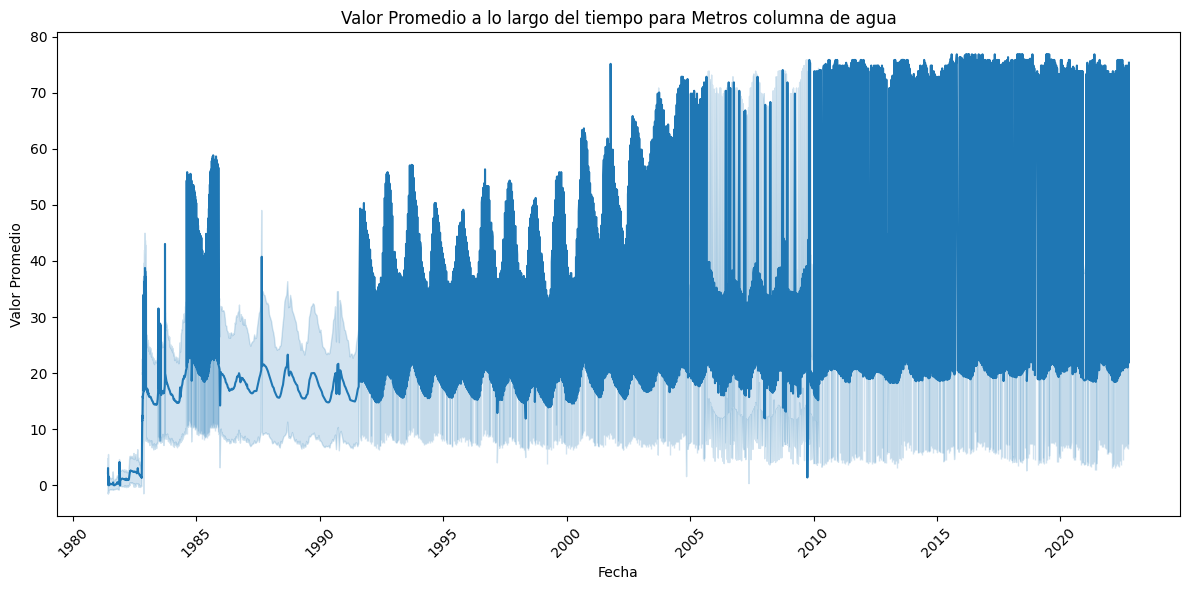

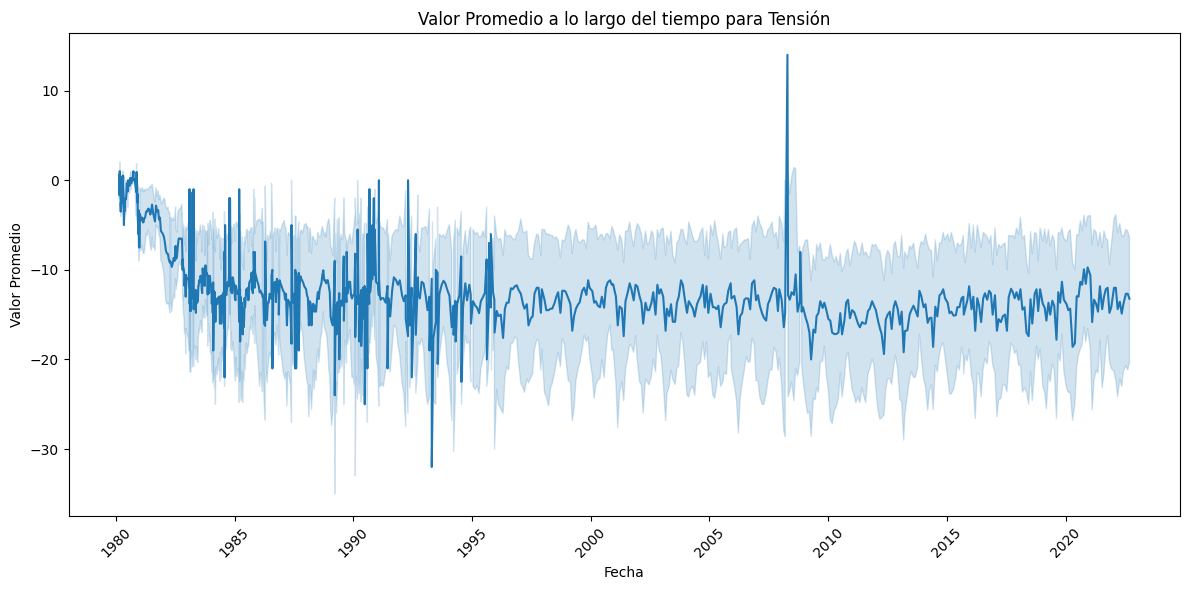

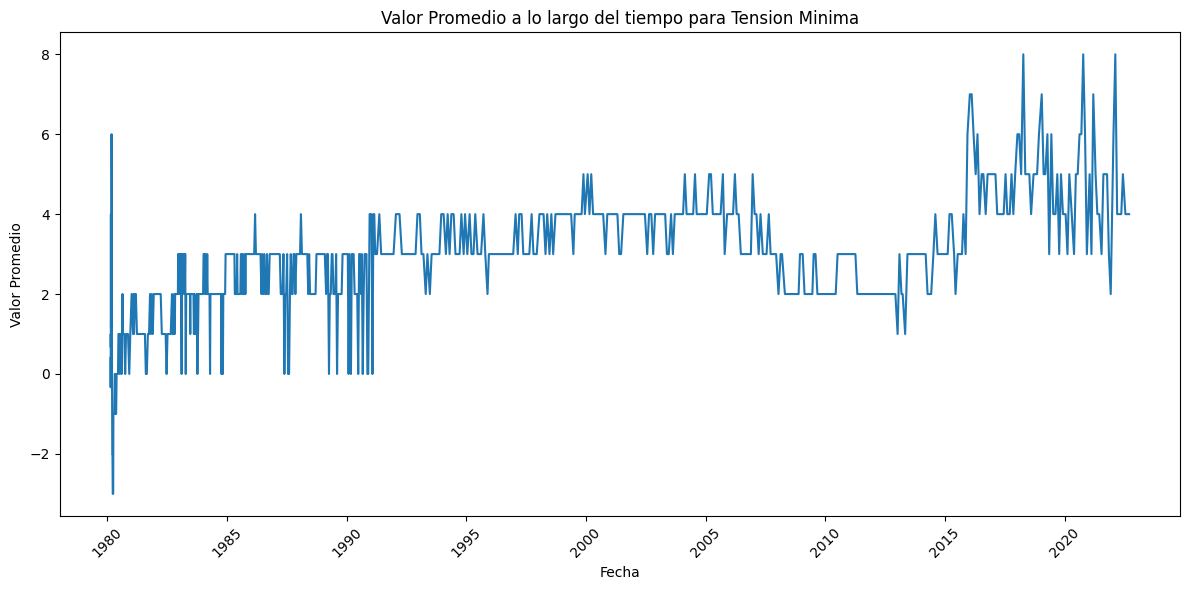

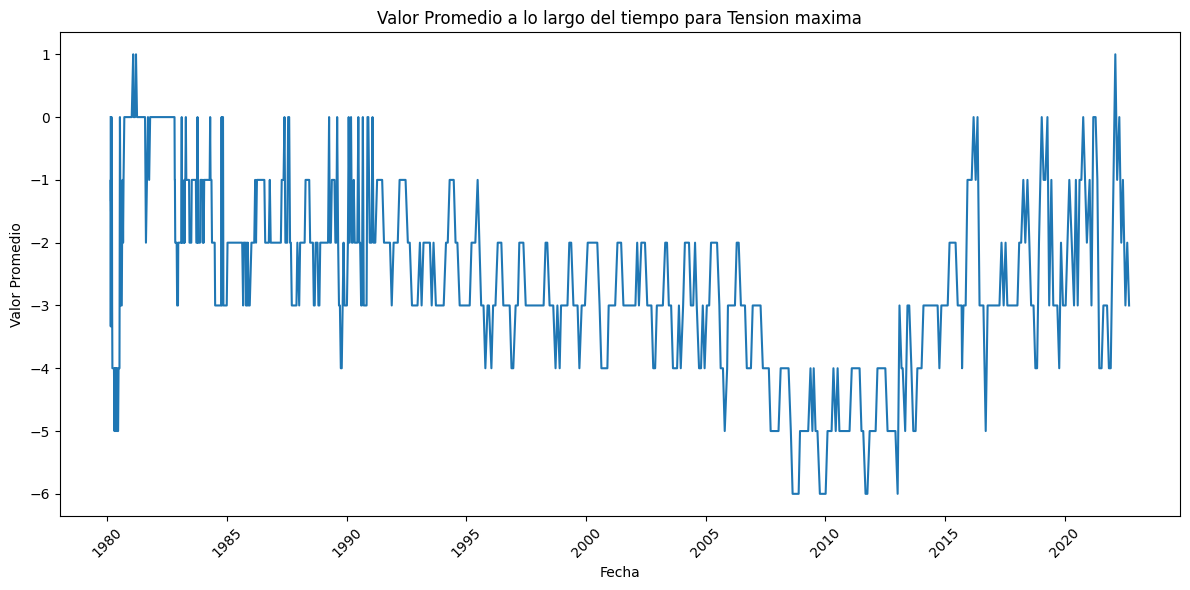

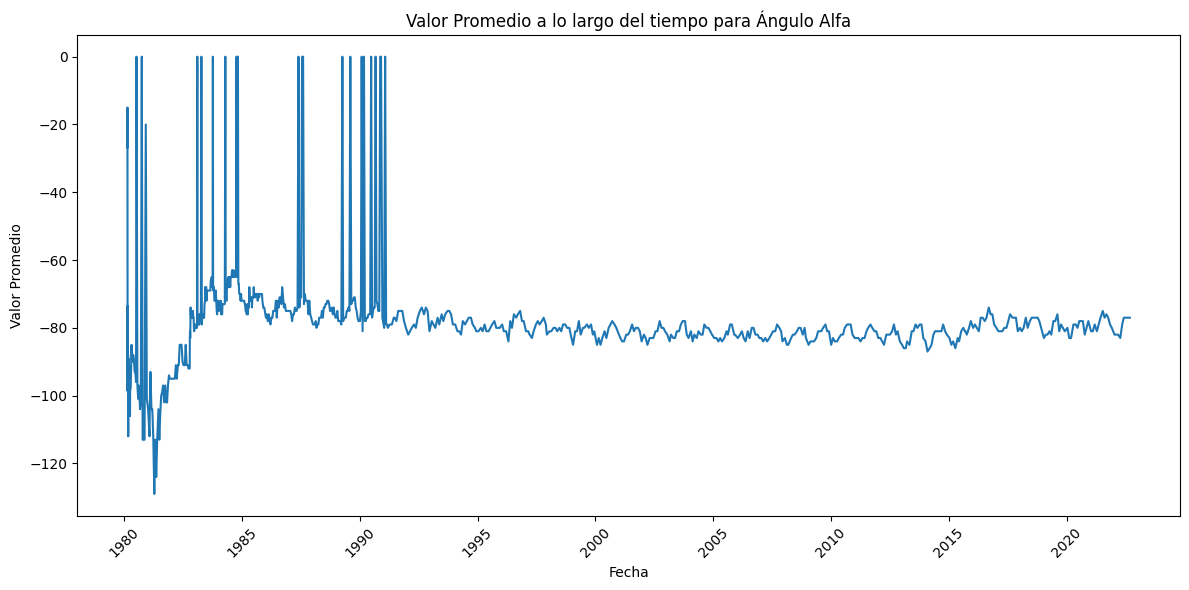

In [ ]:
for variable in unique_variables:
    if pd.notna(variable): # Check if the variable is not NaN
        df_filtered = df_final[df_final['variable_ingenieria'] == variable]

        plt.figure(figsize=(12, 6))
        sns.lineplot(data=df_filtered, x='fecha', y='valor_promedio')
        plt.title(f'Valor Promedio a lo largo del tiempo para {variable}')
        plt.xlabel('Fecha')
        plt.ylabel('Valor Promedio')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

## Translate markdown cells

### Subtask:
Translate the text in all relevant markdown cells to Spanish.


**Reasoning**:
Translate the markdown cell containing the main task description to Spanish.



In [ ]:
%%markdown
# Tarea
Generar gráficos de series temporales para cada valor único en la columna 'variable_ingenieria' del dataframe `df_final`, usando 'fecha' como eje x y 'valor_promedio' como eje y.

# Tarea
Generar gráficos de series temporales para cada valor único en la columna 'variable_ingenieria' del dataframe `df_final`, usando 'fecha' como eje x y 'valor_promedio' como eje y.


**Reasoning**:
Translate the markdown cell containing the subtask description to Spanish.



In [ ]:
%%markdown
## Identificar variables únicas

### Subtarea:
Encontrar todos los valores únicos en la columna 'variable_ingenieria' de `df_final`.

## Identificar variables únicas

### Subtarea:
Encontrar todos los valores únicos en la columna 'variable_ingenieria' de `df_final`.


**Reasoning**:
Translate the markdown cell containing the reasoning for identifying unique variables to Spanish.



In [ ]:
%%markdown
**Razonamiento**:
Encontrar todos los valores únicos en la columna 'variable_ingenieria' de `df_final` para comprender los diferentes tipos de mediciones disponibles para graficar.

**Razonamiento**:
Encontrar todos los valores únicos en la columna 'variable_ingenieria' de `df_final` para comprender los diferentes tipos de mediciones disponibles para graficar.


**Reasoning**:
Translate the markdown cell containing the reasoning for inspecting df_fusionado to Spanish.



In [ ]:
%%markdown
**Razonamiento**:
La salida anterior muestra solo 'nan' como un valor único en 'variable_ingenieria' en `df_final`. Esto indica que la operación de fusión no propagó correctamente la información de 'variable_ingenieria' de `df_instrumentos` a `df_final`. Necesito inspeccionar `df_fusionado` para ver si la columna 'variable_ingenieria' se fusionó correctamente antes de la fusión final con `df_embalse`.

**Razonamiento**:
La salida anterior muestra solo 'nan' como un valor único en 'variable_ingenieria' en `df_final`. Esto indica que la operación de fusión no propagó correctamente la información de 'variable_ingenieria' de `df_instrumentos` a `df_final`. Necesito inspeccionar `df_fusionado` para ver si la columna 'variable_ingenieria' se fusionó correctamente antes de la fusión final con `df_embalse`.


**Reasoning**:
Translate the markdown cell explaining the correction of the merge operation to Spanish.



In [ ]:
%%markdown
**Razonamiento**:
La columna 'variable_ingenieria' sigue siendo todo NaNs en `df_fusionado`. Esto confirma que el problema está en el primer paso de fusión. Se intentó la fusión usando `left_on='nombre_etiqueta'` de `df_lecturas` y `right_on='etiqueta_padre'` de `df_instrumentos`. El encabezado de `df_fusionado` muestra que `etiqueta_padre` es todo NaNs después de la fusión, y los valores únicos en `variable_ingenieria` también son todo NaNs. Esto indica que la clave de fusión `etiqueta_padre` de `df_instrumentos` no coincidió con `nombre_etiqueta` de `df_lecturas`. Al observar las columnas impresas anteriormente, parece que la clave de fusión correcta debería ser `nombre_etiqueta` en `df_lecturas` y `nombre_etiqueta` en `df_instrumentos`. Corregiré la operación de fusión.

**Razonamiento**:
La columna 'variable_ingenieria' sigue siendo todo NaNs en `df_fusionado`. Esto confirma que el problema está en el primer paso de fusión. Se intentó la fusión usando `left_on='nombre_etiqueta'` de `df_lecturas` y `right_on='etiqueta_padre'` de `df_instrumentos`. El encabezado de `df_fusionado` muestra que `etiqueta_padre` es todo NaNs después de la fusión, y los valores únicos en `variable_ingenieria` también son todo NaNs. Esto indica que la clave de fusión `etiqueta_padre` de `df_instrumentos` no coincidió con `nombre_etiqueta` de `df_lecturas`. Al observar las columnas impresas anteriormente, parece que la clave de fusión correcta debería ser `nombre_etiqueta` en `df_lecturas` y `nombre_etiqueta` en `df_instrumentos`. Corregiré la operación de fusión.


**Reasoning**:
Translate the markdown cell containing the subtask description for iterating and plotting to Spanish.



In [ ]:
%%markdown
## Iterar y graficar

### Subtarea:
Iterar a través de cada variable única. Para cada variable, filtrar `df_final` para incluir solo las filas correspondientes a esa variable y luego crear un gráfico de series temporales de 'valor_promedio' contra 'fecha'.

## Iterar y graficar

### Subtarea:
Iterar a través de cada variable única. Para cada variable, filtrar `df_final` para incluir solo las filas correspondientes a esa variable y luego crear un gráfico de series temporales de 'valor_promedio' contra 'fecha'.


**Reasoning**:
Translate the markdown cell containing the reasoning for iterating and plotting to Spanish.



In [ ]:
%%markdown
**Razonamiento**:
Iterar a través de las variables únicas, filtrar los datos y crear un gráfico de series temporales para cada variable.

**Razonamiento**:
Iterar a través de las variables únicas, filtrar los datos y crear un gráfico de series temporales para cada variable.


**Reasoning**:
Translate the markdown cell containing the summary of the data analysis key findings and insights to Spanish.



In [ ]:
%%markdown
## Resumen:

### Hallazgos clave del análisis de datos

* Inicialmente, la columna 'variable_ingenieria' en `df_final` contenía solo valores `NaN` debido a una operación de fusión incorrecta entre `df_lecturas` y `df_instrumentos`. La fusión se corrigió para usar 'nombre_etiqueta' de ambos dataframes, poblando exitosamente la columna con valores únicos significativos.
* Se generaron exitosamente gráficos de series temporales para cada valor único en la columna 'variable_ingenieria', mostrando 'valor_promedio' a lo largo del tiempo ('fecha').

### Perspectivas o próximos pasos

* Los gráficos generados proporcionan una visión general de cómo el 'valor_promedio' de cada variable de ingeniería cambia con el tiempo, lo que puede usarse para identificar tendencias, estacionalidad o anomalías.
* Un análisis posterior podría implicar la comparación de las series temporales de diferentes variables o la realización de análisis estadísticos sobre las tendencias observadas en los gráficos.

## Resumen:

### Hallazgos clave del análisis de datos

* Inicialmente, la columna 'variable_ingenieria' en `df_final` contenía solo valores `NaN` debido a una operación de fusión incorrecta entre `df_lecturas` y `df_instrumentos`. La fusión se corrigió para usar 'nombre_etiqueta' de ambos dataframes, poblando exitosamente la columna con valores únicos significativos.
* Se generaron exitosamente gráficos de series temporales para cada valor único en la columna 'variable_ingenieria', mostrando 'valor_promedio' a lo largo del tiempo ('fecha').

### Perspectivas o próximos pasos

* Los gráficos generados proporcionan una visión general de cómo el 'valor_promedio' de cada variable de ingeniería cambia con el tiempo, lo que puede usarse para identificar tendencias, estacionalidad o anomalías.
* Un análisis posterior podría implicar la comparación de las series temporales de diferentes variables o la realización de análisis estadísticos sobre las tendencias observadas en los gráficos.


## Summary:

### Data Analysis Key Findings

* Initially, the 'variable_ingenieria' column in `df_final` contained only `NaN` values due to an incorrect merge operation between `df_lecturas` and `df_instrumentos`. The merge was corrected to use 'nombre_etiqueta' from both dataframes, successfully populating the column with meaningful unique values.
* Time series plots were successfully generated for each unique value in the 'variable_ingenieria' column, showing 'valor_promedio' over time ('fecha').

### Insights or Next Steps

* The generated plots provide a visual overview of how the 'valor_promedio' for each engineering variable changes over time, which can be used to identify trends, seasonality, or anomalies.
* Further analysis could involve comparing the time series of different variables or performing statistical analysis on the trends observed in the plots.

## Resumen:

### Hallazgos clave del análisis de datos

* Inicialmente, la columna 'variable_ingenieria' en `df_final` contenía solo valores `NaN` debido a una operación de fusión incorrecta entre `df_lecturas` y `df_instrumentos`. La fusión se corrigió para usar 'nombre_etiqueta' de ambos dataframes, poblando exitosamente la columna con valores únicos significativos.
* Se generaron exitosamente gráficos de series temporales para cada valor único en la columna 'variable_ingenieria', mostrando 'valor_promedio' a lo largo del tiempo ('fecha').

### Perspectivas o próximos pasos

* Los gráficos generados proporcionan una visión general de cómo el 'valor_promedio' de cada variable de ingeniería cambia con el tiempo, lo que puede usarse para identificar tendencias, estacionalidad o anomalías.
* Un análisis posterior podría implicar la comparación de las series temporales de diferentes variables o la realización de análisis estadísticos sobre las tendencias observadas en los gráficos.

In [ ]:
# Guardar el DataFrame de los datos_fusionados a un archivo Excel
output_filename = 'datos_fusionados.xlsx'
df_final.to_excel(output_filename, index=False)
print(f"DataFrame fusionado guardado en '{output_filename}'")

DataFrame fusionado guardado en 'datos_fusionados.xlsx'
